# **0. 라이브러리 import**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action = 'ignore')

# **1. 데이터 불러오기**

## **📌 Data Description**
- index: 구분자
- quality: 품질(target 변수) - 범주형
- fixed acidity: 산도
- volatile acidity: 휘발성산
- citric acid: 시트르산
- residual sugar: 잔당(발효 후 와인 속에 남아있는 당분)
- chlorides: 염화물
- free sulfur dioxide: 독립 이산화황
- total sulfur dioxide: 총 이산화황
- density: 밀도
- pH: 수소이온농도
- sulphates: 황산염
- alcohol: 도수
- type: 종류(white vs red)

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
### train 데이터
# index를 제외하면 총 13개 변수를 가짐
# quality(와인의 품질) - target 변수

train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
### test 데이터
# index를 제외하면 총 12개 변수를 가짐

test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


- 와인의 종류에 따라 성질과 품질이 달라질 것이라고 판단함
    - red 와인과 white 와인을 **분리**한 후, 각각에 대한 품질 분류 모델을 별도로 생성

# **2. 데이터 전처리 & EDA**

In [5]:
### 필요없는 변수 제거
# index는 불필요한 변수이므로 삭제

train = train.drop(['index'], axis = 1)
test = test.drop(['index'], axis = 1)

## **2-1. 데이터 구조 확인**

In [6]:
### train 데이터의 column 정보 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [7]:
### test 데이터의 column 정보 확인

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


- type을 제외하고는 모두 숫자형 변수이다.
- 결측치는 존재하지 않는다.

In [8]:
train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


- 데이터들 간의 스케일 차이가 존재함을 확인할 수 있다.
    - 표준화(StandardScaler) 진행
- 데이터 중 일부 이상치가 존재함을 짐작할 수 있다.

## **2-2. 데이터 분포 확인**

### **a) Target 값의 분포**

In [9]:
train['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

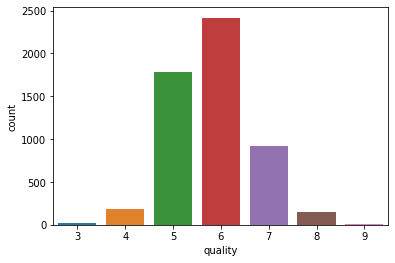

In [10]:
sns.countplot(x = train['quality'])

- quality의 클래스가 너무 많다.
    - 5,6이 대부분
    - 3과 8은 매우 적은 수
- 품질을 모아서 4개의 클래스로 재분류
    - 3 + 4 => 4 (worst)
    - 5 (bad)
    - 6 (good)
    - 7 + 8 + 9 => 7 (best)

In [11]:
### 클래스 재분류

train.loc[train['quality'] <= 4, 'new_quality'] = 4
train.loc[train['quality'] == 5, 'new_quality'] = 5
train.loc[train['quality'] == 6, 'new_quality'] = 6
train.loc[train['quality'] >= 7, 'new_quality'] = 7

In [12]:
# 클래스이기에 int 형으로 변환해주기

train = train.astype({'new_quality':'int32'})

In [13]:
train['new_quality'].value_counts()

6    2416
5    1788
7    1081
4     212
Name: new_quality, dtype: int64

<AxesSubplot:xlabel='new_quality', ylabel='count'>

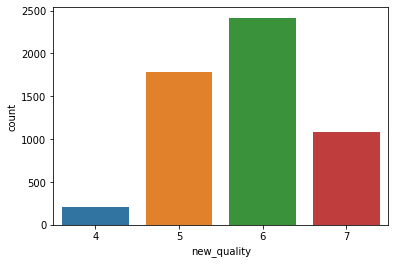

In [14]:
sns.countplot(x = train['new_quality'])

In [15]:
### 기존 quality 제거

train = train.drop('quality', axis = 1)

In [16]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,5
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,5
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,5
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,6
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,6


In [17]:
### Label Encoding
# class가 4,5,6,7인 경우 XGBoost에서 오류 발생(0부터 class가 시작하기를 기대함)
# type 변수 또한 범주형 변수이니 바꿔주기

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['type'] = encoder.fit_transform(train['type'])
test['type'] = encoder.transform(test['type'])

train['new_quality'] = encoder.fit_transform(train['new_quality'])

In [18]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0,1
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1,2
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1,2


In [19]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1


- red는 0, white는 1로 잘 변환되었다.
- class: [4,5,6,7] -> [0,1,2,3]

### **b) 각 feature 변수들의 분포**

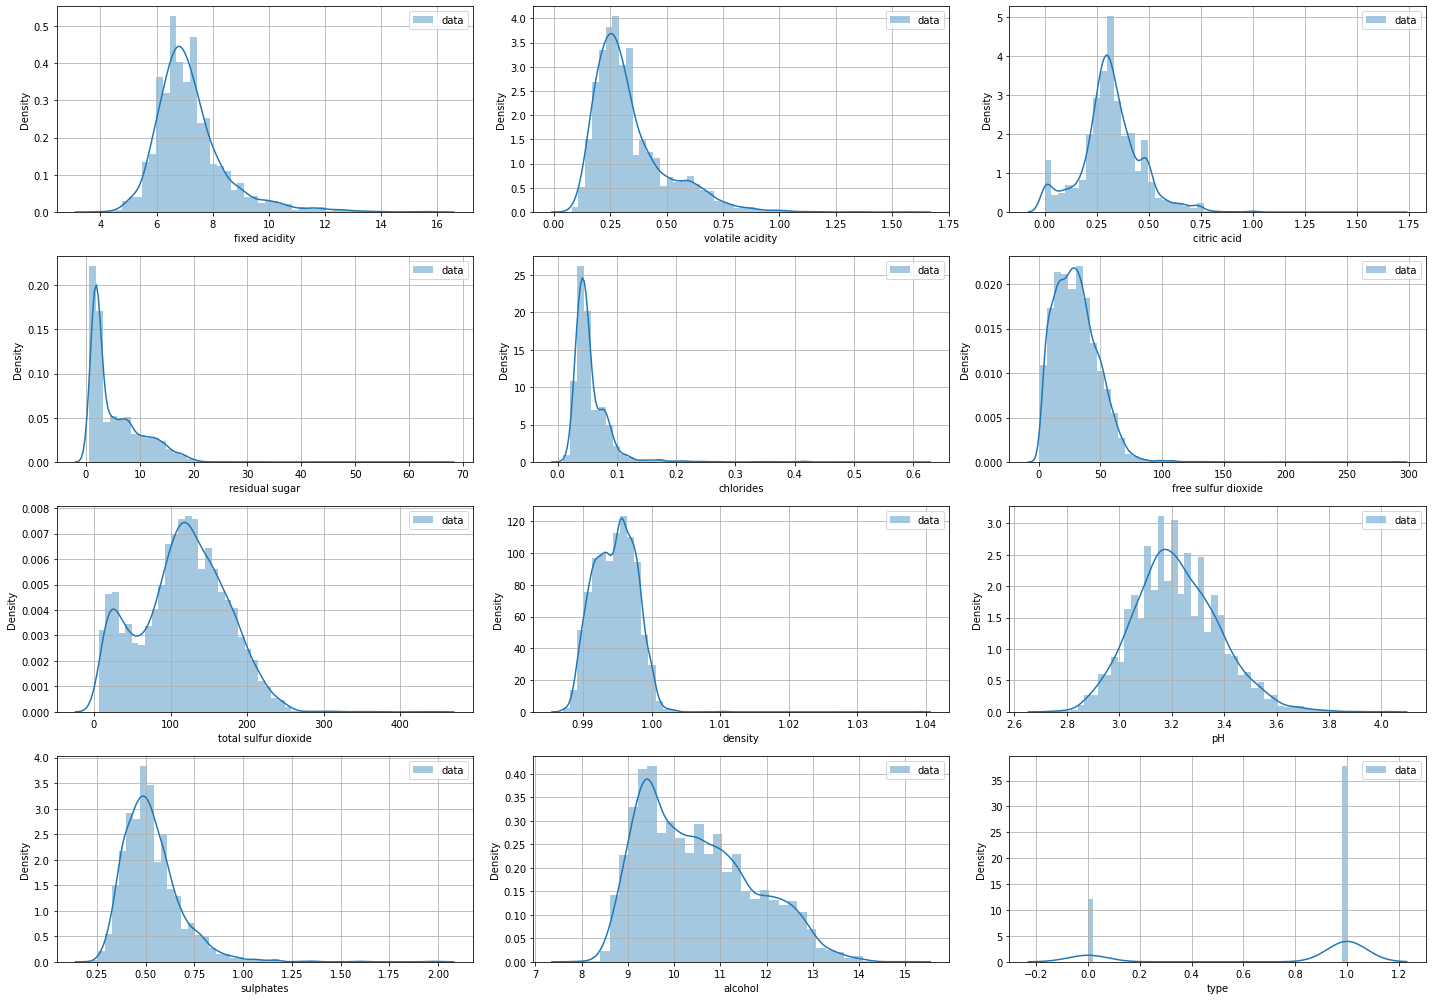

In [20]:
### 변수별 분포 시각화

plt.figure(figsize = (20,14))

for i, col in enumerate(list(train.iloc[:,:-1].columns.values)):
    plt.subplot(4,3,i+1) # 위치 지정
    sns.distplot(train[col], kde = True, label = 'data')
    plt.grid()
    plt.legend(loc = 'upper right')
    plt.tight_layout()

- 대부분의 feature들이 분포에 편향이 있다고 판단된다.(오른쪽으로 긴 꼬리, **positively skewed** )
    - 데이터 변환 방법: 제곱근(square root), 세제곱근(cube root), **로그 변환(log transformation)**

In [21]:
### 각 변수들의 왜도(skewness) 확인

from scipy.stats import skew

features_idx = train.dtypes[train.dtypes != 'object'].index
skew_features = train[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 1.068315


In [22]:
### 왜도가 1 이상인 변수 파악

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

chlorides              5.185911
sulphates              1.914956
fixed acidity          1.710430
residual sugar         1.498545
volatile acidity       1.497435
free sulfur dioxide    1.310273
dtype: float64


### **c) 각 feature 변수와 target 변수 간의 관계**

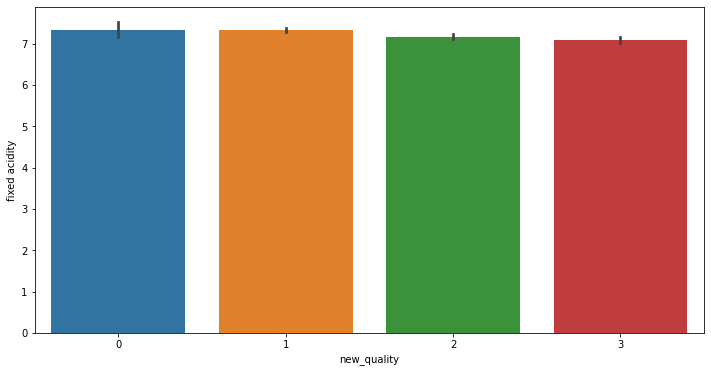

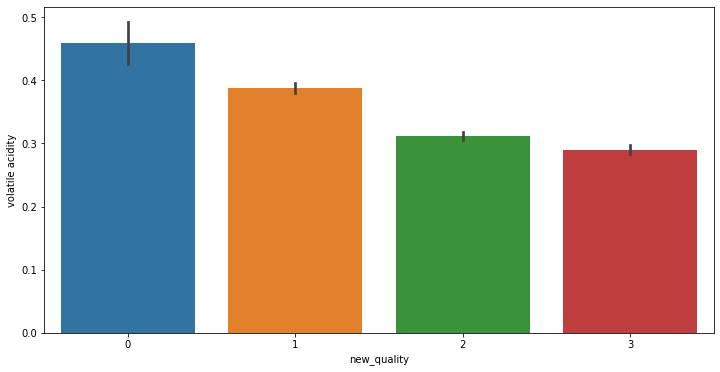

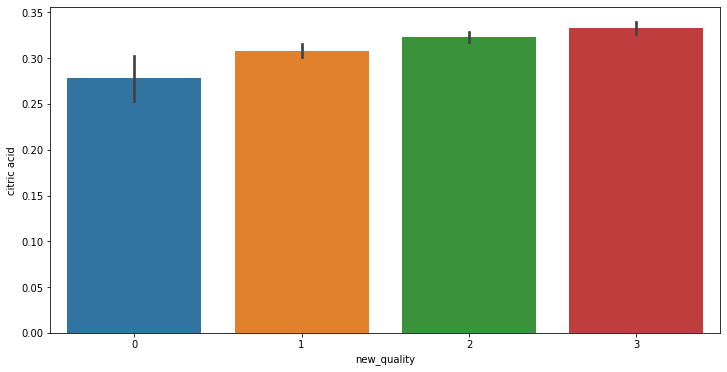

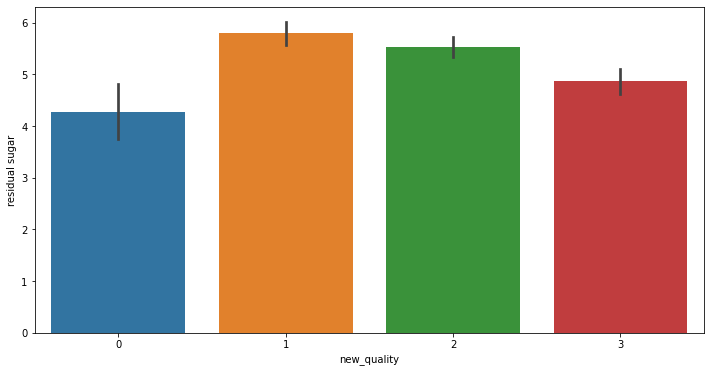

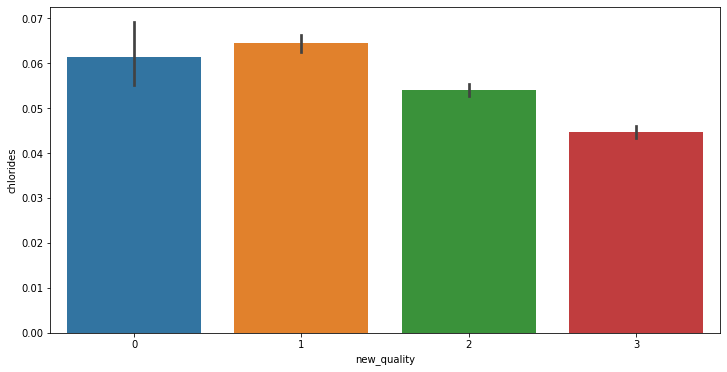

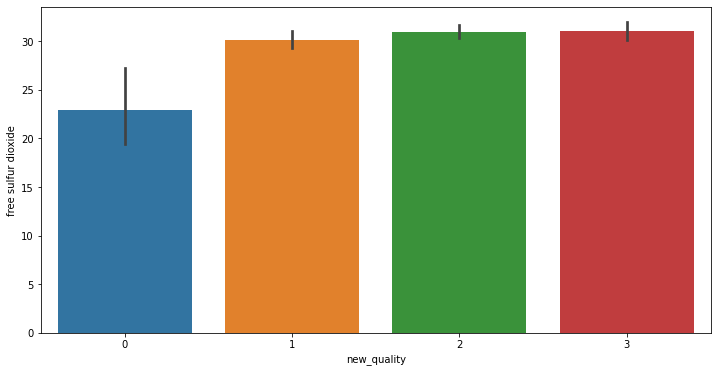

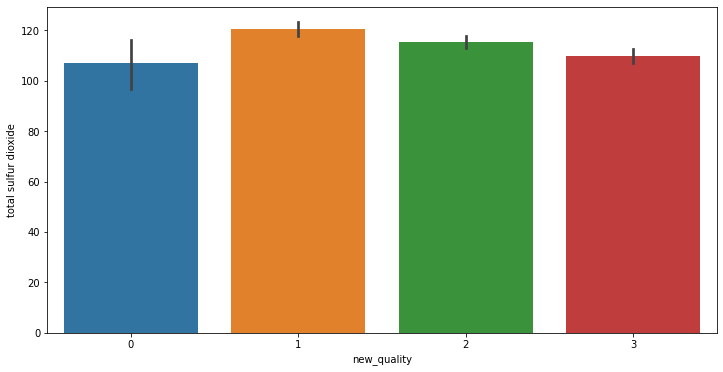

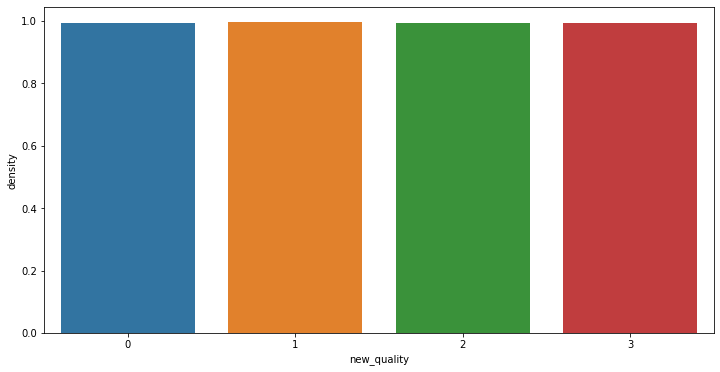

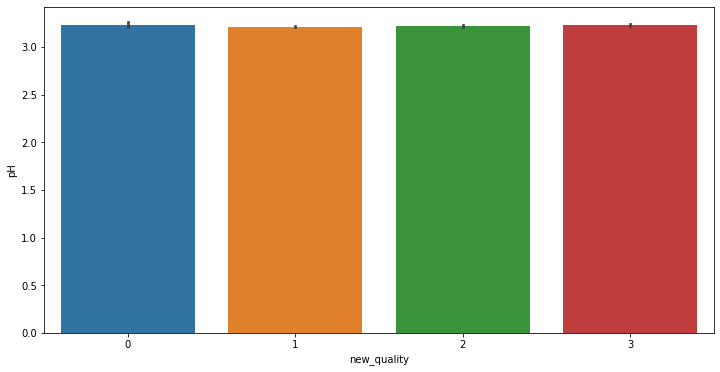

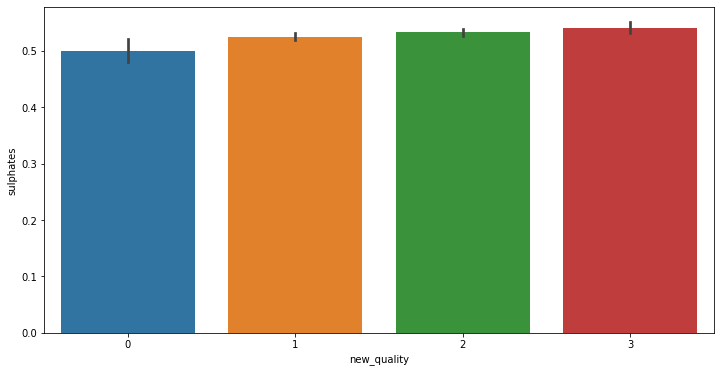

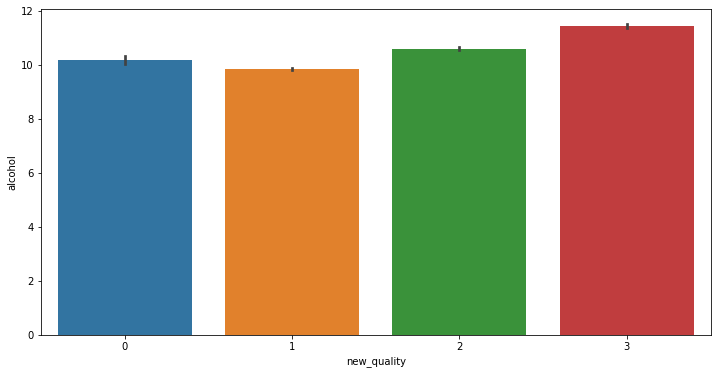

In [23]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'new_quality', 
                y = train.columns[i], 
                data = train)

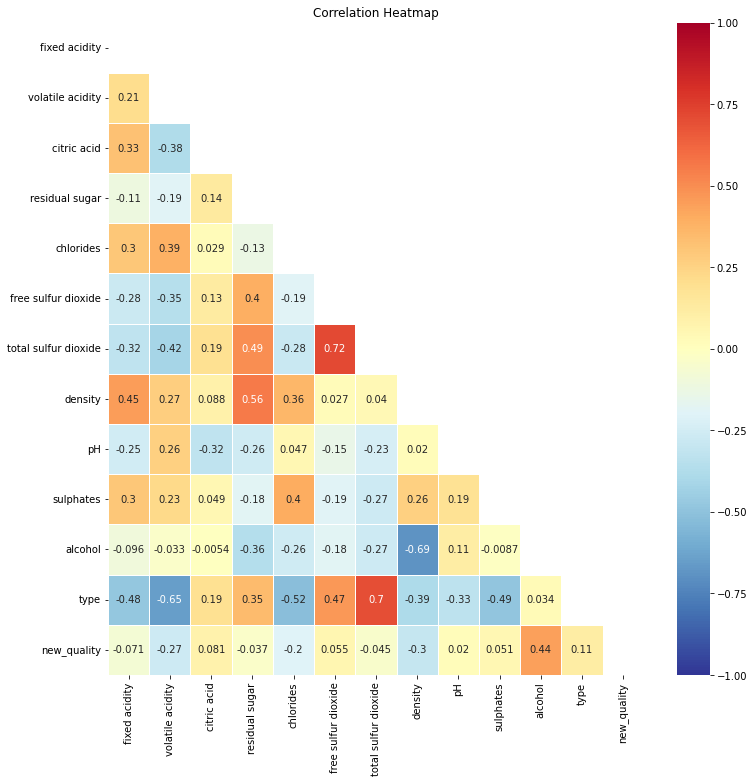

In [24]:
### train의 변수 간 상관관계

# 사이즈 지정
plt.figure(figsize = (12,12))

corr = train.corr()

# 삼각형 마스크 만들기(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths = .5,  # 경계면을 실선으로 구분하기
            vmin = -1,vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )  

plt.title('Correlation Heatmap')
plt.show()

- target 변수(quality)와 상관도가 가장 높은 변수는 'alcohol'이다.
    - 상관계수는 0.44로, 약한 양의 선형 상관관계를 가진다고 할 수 있다.
    - 해당 변수에 이상치가 있다면 제거하는 것을 추후에 고려해 볼 수 있다.
- '와인의 '종류'와 '산도', '염화물', 'total_sulfur_dioxide', 'sulphates' 의 상관관계가 크다.
    - 와인의 종류에 따른 특징 차이가 두드러진다.
- 와인의 '밀도'와 'residual sugar', 'alcohol' 상관관계가 크다.
    - 실제로 밀도를 측정하는 기준들
- 'free sulfur dioxide'와 'total_sulfur_dioxide' 간 상관관계가 크다.
   - 이름으로 보아 서로 상관있어 보인다.

# **3. 기본 Modeling**

## **3-1. 데이터 준비**

In [26]:
### feature / target 분리

X = train.drop(['new_quality'], axis = 1)
y = train['new_quality']

In [27]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [28]:
y.head()

0    1
1    1
2    1
3    2
4    2
Name: new_quality, dtype: int64

In [30]:
X.shape, y.shape

((5497, 12), (5497,))

In [31]:
### 표준화
# 데이터 간의 스케일 차이 조정

from sklearn.preprocessing import StandardScaler

colname = X.columns
scaler = StandardScaler() 
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = colname)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,0.567197
1,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,-1.763057
2,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,0.567197
3,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,0.567197
4,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,0.567197


In [32]:
test = scaler.transform(test)
test = pd.DataFrame(test, columns = colname)
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1.390243,-0.172555,1.112802,0.244295,-0.369640,-1.098765,-0.756293,-0.289803,-1.988209,-1.007643,0.916835,0.567197
1,4.730148,0.562696,1.802026,-0.743880,0.409577,-0.872422,-1.342614,1.900261,-0.992553,-0.271277,-1.259963,-1.763057
2,-0.551562,-0.356368,-0.334569,-0.050055,-0.456220,0.768567,1.127044,0.042025,-0.183584,1.067570,-0.925071,0.567197
3,-0.007856,-1.152890,0.492500,-0.764905,-0.369640,-0.532907,0.771697,0.042025,1.869955,-0.405161,-0.422733,0.567197
4,-0.318545,-0.478910,-0.403491,-0.722855,-1.062277,-0.391443,-0.774060,-1.414699,-0.370269,-0.405161,1.084281,0.567197


- 제대로 표준화되었음을 확인할 수 있다.

In [33]:
### 교차 검증
# target 변수의 클래스가 불균형함
# target의 속성값의 개수를 동일하게 가져오기 위해 StratifiedKFold 활용

from sklearn.model_selection import StratifiedKFold

n_splits = 5 # 폴드 수 지정
skf = StratifiedKFold(n_splits = n_splits, 
                      random_state = 0, shuffle = True)

## **3-2. 기본 단일 모델** 

**📌 a) 선형 알고리즘(Linear Algorithm)**  
- LDA(Linear Discriminant Analysis)
- 경사하강법(SGDClassifier)

**📌 b) 비선형 알고리즘(Non-linear Algorithm)**
- 최소 근접 알고리즘(k-Nearest Neighbors)
- 결정 트리(Decision Tree)
- 가우시안 나이브 베이즈(Gaussian Naive Bayes)
- 서포트 벡터 머신(SVC)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [35]:
### 활용할 모델 정의

models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state = 0)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(random_state = 0)))

In [37]:
### 순차적으로 modeling + 학습/예측/검증

results = []
names = []
metrics = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, 
                                 cv = skf, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(metrics),3))

LDA: 0.546
SGD: 0.511
KNN: 0.570
DT: 0.591
NB: 0.452
SVC: 0.581

모든 모델의 평균 메트릭(정확도): 0.542


## **3-3. 기본 앙상블 모델 생성**

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [39]:
ensemble = []

ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
ensemble.append(('XGB', XGBClassifier(random_state = 0)))
ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [40]:
### 순차적으로 modeling + 학습/예측/검증

en_results = []
en_names = []
en_metrics = []

for name, model in ensemble:
    cv_results = cross_val_score(model, X, y, 
                                 cv = skf, scoring = 'accuracy', error_score="raise")
    en_results.append(cv_results)
    en_names.append(name)
    en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(en_metrics),3))

RF: 0.686
Bagging: 0.645
GB: 0.604
XGB: 0.665
LGBM: 0.665
Ada: 0.540
ET: 0.687

모든 모델의 평균 메트릭(정확도): 0.641


# **4. 데이터 변환**
- 왜곡이 심한 변수들에 대해 로그 변환 수행
    - 왜도(skewness)가 1 이상인 변수들만 변환

In [41]:
### 원본 데이터 유지를 위해 복사본 활용

train_2nd = train.copy()
train_2nd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0,1
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1,2
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1,2


In [42]:
### 각 변수들의 왜도(skewness) 확인
# 왜도 측정은 표준화되지 않은 원본 데이터로 수행

from scipy.stats import skew

features_idx = train_2nd.dtypes[train_2nd.dtypes != 'object'].index
skew_features = train_2nd[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 1.068315


In [43]:
### 왜도가 1 이상인 변수 파악

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

chlorides              5.185911
sulphates              1.914956
fixed acidity          1.710430
residual sugar         1.498545
volatile acidity       1.497435
free sulfur dioxide    1.310273
dtype: float64


In [44]:
### 로그 변환 적용
# 데이터를 변환하기 위해서는 데이터가 양수여야 함
# 따라서, 모든 데이터에 1을 더해준 후 로그 변환 수행

from scipy import stats

skewed = list(skew_features_top.index)

for ftr in skewed:
    train_2nd[ftr] = np.log1p(train_2nd[ftr])

train_2nd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,1.887070,0.527683,0.06,2.054124,0.041142,2.302585,84.0,0.99432,3.44,0.364643,10.2,1,1
1,2.282382,0.476234,0.14,1.223775,0.064851,2.397895,42.0,0.99690,3.19,0.463734,9.5,0,1
2,2.186051,0.190620,0.39,1.098612,0.055435,3.091042,138.0,0.99176,3.05,0.418710,10.9,1,1
3,2.079442,0.190620,0.31,1.945910,0.044973,3.401197,108.0,0.99390,3.26,0.405465,10.8,1,2
4,2.174752,0.336472,0.26,2.351375,0.057325,3.496508,178.0,0.99550,3.04,0.357674,10.9,1,2


In [45]:
### 각 변수들의 왜도(skewness) 확인

features_idx = train_2nd.dtypes[train_2nd.dtypes != 'object'].index
skew_features = train_2nd[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 0.619902


In [46]:
### 왜도가 1 이상인 변수 파악

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

chlorides           4.365419
sulphates           1.159555
volatile acidity    1.126251
dtype: float64


- 데이터 왜곡 정도가 완화됨

In [47]:
### feature / target 분리

X_2nd = train_2nd.drop(['new_quality'], axis = 1)
y_2nd = train_2nd['new_quality']

In [48]:
### 표준화 재수행

colname = X_2nd.columns
scaler = StandardScaler() 
X_2nd = scaler.fit_transform(X_2nd)
X_2nd = pd.DataFrame(X_2nd, columns = colname)
X_2nd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-1.435945,2.134055,-1.781940,0.636288,-0.414966,-1.471879,-0.560852,-0.117252,1.372128,-0.617384,-0.255287,0.567197
1,1.301631,1.682531,-1.230560,-0.582618,0.361186,-1.326082,-1.307080,0.738864,-0.183584,0.463416,-0.841348,-1.763057
2,0.634530,-0.824084,0.492500,-0.766350,0.052930,-0.265766,0.398583,-0.966732,-1.054782,-0.027664,0.330774,0.567197
3,-0.103752,-0.824084,-0.058879,0.477437,-0.289538,0.208681,-0.134436,-0.256620,0.252016,-0.172132,0.247051,0.567197
4,0.556279,0.455947,-0.403491,1.072637,0.114814,0.354479,1.109276,0.274305,-1.117010,-0.693392,0.330774,0.567197


### **a) 단일 모델**

In [49]:
### 활용할 모델 정의

models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state = 0)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(random_state = 0)))

In [51]:
### 순차적으로 modeling + 학습/예측/검증

results = []
names = []
metrics = []

for name, model in models:
    cv_results = cross_val_score(model, X_2nd, y_2nd, 
                                 cv = skf, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(metrics),3))

LDA: 0.553
SGD: 0.513
KNN: 0.577
DT: 0.591
NB: 0.464
SVC: 0.586

모든 모델의 평균 메트릭(정확도): 0.547


- 전반적으로 성능이 조금 향상되었다.

### **b) 앙상블 모델**

In [52]:
ensemble = []

ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
ensemble.append(('XGB', XGBClassifier(random_state = 0)))
ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [53]:
### 순차적으로 modeling + 학습/예측/검증

en_results = []
en_names = []
en_metrics = []

for name, model in ensemble:
    cv_results = cross_val_score(model, X_2nd, y_2nd, 
                                 cv = skf, scoring = 'accuracy')
    en_results.append(cv_results)
    en_names.append(name)
    en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(en_metrics),3))

RF: 0.687
Bagging: 0.647
GB: 0.603
XGB: 0.665
LGBM: 0.666
Ada: 0.540
ET: 0.688

모든 모델의 평균 메트릭(정확도): 0.642


- 단일 모델에서는 성능이 향상되고, 앙상블 모델에서는 성능이 하락됨
    - 현재 앙상블 모델의 성능이 대부분 더 좋다.
    - 성능이 떨어지기에 로그 변환을 하지 않는 쪽으로 결정

# **5. 변수들 간의 상관도**

## **5-1. target 변수와의 상관도**

- target 변수와 가장 상관도가 높은 변수는 alcohol이다.
- 해당 변수의 이상치를 제거해보자.

In [56]:
### 데이터 원본을 유지하기 위해 복사본 활용

X_3rd = X.copy()
y_3rd = y.copy()

In [57]:
train_3 = pd.concat([X_3rd, y_3rd], axis = 1)

In [58]:
### 이상치 제거 함수

def get_outlier(df = None, column = None, weight = 1.5):
    # 1/4 분위와 3/4 분위 지점을 np.percentile로 구함 
    df = df[column]
    quantile_25 = np.percentile(df.values, 25)
    quantile_75 = np.percentile(df.values, 75)
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = df[(df < lowest_val) | (df > highest_val)].index
    
    return outlier_index

In [59]:
### alcohol에서 이상치 찾기

outlier_index = get_outlier(df = train_3, column = 'alcohol', weight = 1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([2787, 4964, 5340], dtype='int64')


In [60]:
### 이상치 데이터 삭제

train_3.drop(outlier_index, axis = 0, inplace = True)

In [61]:
### feature/target 분리

X_3rd = train_3.drop(['new_quality'], axis = 1)
y_3rd = train_3['new_quality']

### **a) 단일 모델**

In [62]:
### 활용할 모델 정의

models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state = 0)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(random_state = 0)))

In [63]:
### 순차적으로 modeling + 학습/예측/검증

results = []
names = []
metrics = []

for name, model in models:
    cv_results = cross_val_score(model, X_3rd, y_3rd, 
                                 cv = skf, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(metrics),3))

LDA: 0.546
SGD: 0.510
KNN: 0.565
DT: 0.595
NB: 0.460
SVC: 0.587

모든 모델의 평균 메트릭(정확도): 0.544


### **b) 앙상블 모델**

In [64]:
ensemble = []

ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
ensemble.append(('XGB', XGBClassifier(random_state = 0)))
ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [65]:
### 순차적으로 modeling + 학습/예측/검증

en_results = []
en_names = []
en_metrics = []

for name, model in ensemble:
    cv_results = cross_val_score(model, X_3rd, y_3rd, 
                                 cv = skf, scoring = 'accuracy')
    en_results.append(cv_results)
    en_names.append(name)
    en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(en_metrics),3))

RF: 0.681
Bagging: 0.655
GB: 0.592
XGB: 0.662
LGBM: 0.655
Ada: 0.529
ET: 0.683

모든 모델의 평균 메트릭(정확도): 0.637


- 성능이 오히려 하락함
    - 원본 데이터 유지

## **5-2. feature 변수들 간의 상관도**

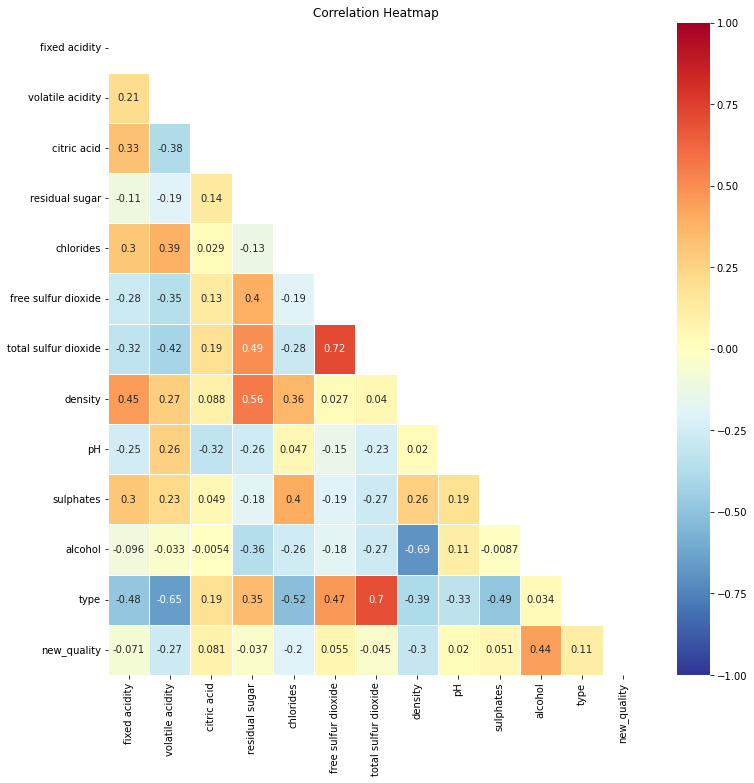

- target 변수(quality)와 상관도가 가장 높은 변수는 'alcohol'이다.
- '와인의 '종류'와 '산도', '염화물', 'total sulfur dioxide', 'sulphates' 의 상관관계가 크다.
    - 와인의 종류에 따른 특징 차이가 두드러진다.
    - 나머지 모든 변수들 중 type과 상관계수가 0.5 이상인 변수들을 삭제
- 와인의 '밀도'와 'residual sugar', 'alcohol' 상관관계가 크다.
    - 실제로 밀도를 측정하는 기준들
    - residual sugar는 alcohol과도 상관관계가 어느정도 있기에, 삭제 결정
- 'free sulfur dioxide'와 'total sulfur dioxide' 간 상관관계가 크다.
   - 이름으로 보아 서로 상관있어 보인다.

> 최종 삭제 변수: volatile acidity, chlorides, total sulfur dioxide

- 변수 판단 기준: 아래 링크 활용
    - [와인상식](http://the-scent.co.kr/bbs/board.php?bo_table=wine_how_to&wr_id=29&page=7)

⭐ **이후 최종 예측 시 test에서도 해당 변수들을 제거해 주는 거 잊지 말기!**

In [66]:
### 데이터 원본을 유지하기 위해 복사본 활용

X_4th = X.copy()
y_4th = y.copy()

In [67]:
train_4 = pd.concat([X_4th, y_4th], axis = 1)

In [69]:
train_4 = train_4.drop(['volatile acidity', 'chlorides', 'total sulfur dioxide'], axis = 1)
train_4.head()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,-1.250611,-1.781940,0.286345,-1.211937,-0.117252,1.372128,-0.605988,-0.255287,0.567197,1
1,1.234899,-1.230560,-0.638755,-1.155351,0.738864,-0.183584,0.398147,-0.841348,-1.763057,1
2,0.535849,0.492500,-0.722855,-0.532907,-0.966732,-1.054782,-0.070450,0.330774,0.567197,1
3,-0.163201,-0.058879,0.118145,-0.080221,-0.256620,0.252016,-0.204334,0.247051,0.567197,2
4,0.458177,-0.403491,0.854020,0.089537,0.274305,-1.117010,-0.672931,0.330774,0.567197,2


In [70]:
### feature/target 분리

X_4th = train_4.drop(['new_quality'], axis = 1)
y_4th = train_4['new_quality']

### **a) 단일 모델**

In [71]:
### 활용할 모델 정의

models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state = 0)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(random_state = 0)))

In [72]:
### 순차적으로 modeling + 학습/예측/검증

results = []
names = []
metrics = []

for name, model in models:
    cv_results = cross_val_score(model, X_4th, y_4th, 
                                 cv = skf, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(metrics),3))

LDA: 0.529
SGD: 0.486
KNN: 0.550
DT: 0.596
NB: 0.483
SVC: 0.558

모든 모델의 평균 메트릭(정확도): 0.534


### **b) 앙상블 모델**

In [73]:
ensemble = []

ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
ensemble.append(('XGB', XGBClassifier(random_state = 0)))
ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [74]:
### 순차적으로 modeling + 학습/예측/검증

en_results = []
en_names = []
en_metrics = []

for name, model in ensemble:
    cv_results = cross_val_score(model, X_4th, y_4th, 
                                 cv = skf, scoring = 'accuracy')
    en_results.append(cv_results)
    en_names.append(name)
    en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(en_metrics),3))

RF: 0.663
Bagging: 0.642
GB: 0.576
XGB: 0.655
LGBM: 0.637
Ada: 0.517
ET: 0.669

모든 모델의 평균 메트릭(정확도): 0.623


- 대부분 성능이 떨어짐

# **6. 데이터 불균형 처리**

## **6-1. 클래스 가중치 부여(Weight Balancing)**

- 관련 코드 같은 걸 찾기는 했는데,, 잘못 적용한 건지 성능이 너무 떨어져서 지웠습니다...ㅎ  
(원래는 가중치 주면 비슷하거나 성능이 올라가면 올라가지 내려가는 경우는 거의 없음,,)
- 혹시 활용할 사람 있을까봐 링크 남겨둘게용
    - [Reference](https://medium.com/grabngoinfo/balanced-weights-for-imbalanced-classification-465f0e13c5ad)

## **6-2. SMOTE**
- 클래스를 모아도 클래스 간의 불균형이 해결되지는 x
    - 오버샘플링 적용

In [75]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_over, y_over = smote.fit_resample(X, y)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X.shape, y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_over.shape, y_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5497, 12) (5497,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (9664, 12) (9664,)
SMOTE 적용 후 레이블 값 분포: 
 1    2416
2    2416
3    2416
0    2416
Name: new_quality, dtype: int64


- SMOTE 적용 후 클래스 4의 경우 10배 이상 데이터가 증가함
- 클래스 7의 경우 2배 정도 증가

### **a) 단일 모델**

In [76]:
### 활용할 모델 정의

models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state = 0)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(random_state = 0)))

In [77]:
### 순차적으로 modeling + 학습/예측/검증

results = []
names = []
metrics = []

for name, model in models:
    cv_results = cross_val_score(model, X_over, y_over, 
                                 cv = skf, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(metrics),3))

LDA: 0.525
SGD: 0.490
KNN: 0.735
DT: 0.732
NB: 0.427
SVC: 0.641

모든 모델의 평균 메트릭(정확도): 0.592


### **b) 앙상블 모델**

In [78]:
ensemble = []

ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
ensemble.append(('XGB', XGBClassifier(random_state = 0)))
ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [79]:
### 순차적으로 modeling + 학습/예측/검증

en_results = []
en_names = []
en_metrics = []

for name, model in ensemble:
    cv_results = cross_val_score(model, X_over, y_over, 
                                 cv = skf, scoring = 'accuracy')
    en_results.append(cv_results)
    en_names.append(name)
    en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(en_metrics),3))

RF: 0.826
Bagging: 0.785
GB: 0.669
XGB: 0.805
LGBM: 0.796
Ada: 0.542
ET: 0.841

모든 모델의 평균 메트릭(정확도): 0.752


- 성능이 크게 **향상됨**

# **7. 하이퍼 파라미터 튜닝**

- 성능이 좋은 모델은 **ExtraTrees**, **LGBM**, **XGB**임
    - 모두 **Oversampling** 된 데이터로 학습
- 해당 모델들에 대해 **하이퍼 파라미터 튜닝**을 적용해 보자.
- [extraTrees 설명](https://velog.io/@nata0919/Extra-Trees-%EC%A0%95%EB%A6%AC)

### **7-1. ExtraTrees**

In [80]:
from sklearn.model_selection import GridSearchCV

In [82]:
params = {
    'n_estimators' : [100, 200, 300, 400, 500]
}

### 모델 객체
et = ExtraTreesClassifier(random_state = 0)

skf = StratifiedKFold(n_splits = 5, 
                      random_state = 0, shuffle = True)
grid = GridSearchCV(estimator = et, param_grid = params, 
                    scoring = 'accuracy', cv = skf)
grid_result = grid.fit(X_over, y_over)

print("최적 모델: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

최적 모델: 0.843335 using {'n_estimators': 300}


In [85]:
### 최적 모델 생성

et_opt = ExtraTreesClassifier(n_estimators = 300, random_state = 0)

### **7-2. LightGBM**
- [lgbm 파라미터 튜닝](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

In [83]:
params = {
    'boosting_type' : ['gbdt', 'dart'], 
    'learning_rate' : [0.01, 0.05, 0.1],
    'n_estimators' : [50, 100, 150, 200],
    'num_leaves' : [20, 30, 40]
}

### 모델 객체
lgbm = LGBMClassifier(random_state = 0)

skf = StratifiedKFold(n_splits = 5, 
                      random_state = 0, shuffle = True)
grid = GridSearchCV(estimator = lgbm, param_grid = params, 
                    scoring = 'accuracy', cv = skf)
grid_result = grid.fit(X_over, y_over)

print("최적 모델: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

최적 모델: 0.824503 using {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 40}


In [86]:
lgbm_opt = LGBMClassifier(boosting_type = 'gbdt',learning_rate = 0.1,
                          n_estimators = 200,num_leaves = 40, random_state = 0)

### **7-3. XGB**

In [84]:
params = {
    'tree_method' : ['exact', 'gpu_hist'],
    'learning_rate' : [0.01, 0.1, 0.3],
    'max_depth' : [4,6,8],
    'max_leaves' : [200, 300, 400],
}

### 모델 객체
xgb = XGBClassifier(random_state = 0)

skf = StratifiedKFold(n_splits = 5, 
                      random_state = 0, shuffle = True)
grid = GridSearchCV(estimator = xgb, param_grid = params, 
                    scoring = 'accuracy', cv = skf)
grid_result = grid.fit(X_over, y_over)

print("최적 모델: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

최적 모델: 0.823261 using {'learning_rate': 0.3, 'max_depth': 8, 'max_leaves': 200, 'tree_method': 'gpu_hist'}


In [87]:
xgb_opt = XGBClassifier(learning_rate = 0.3, max_depth = 8, max_leaves = 200, 
                        tree_method = 'gpu_hist',random_state = 0)

# **8. 스태킹 모델 생성**
- 개별 모델: hyper parameter tuning을 적용한 ```ET```, ```LGBM```, ```XGB```
- 최종 예측 모델: ```RandomForest```

In [88]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

### 개별 기반 모델에서 최종 메타 모델이 사용할 학습/테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds 값으로 KFold 생성
    skf = StratifiedKFold(n_splits = n_folds, shuffle = True, random_state = 0)
    
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__ , ' model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(skf.split(X_train_n, y_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n.iloc[train_index] 
        y_tr = y_train_n.iloc[train_index] 
        X_te = X_train_n.iloc[valid_index]  
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)       
        
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)    
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터
    # test_pred_mean은 테스트 데이터
    
    return train_fold_pred, test_pred_mean

**✔ 에러 해결**  
```.iloc[]```는 기본적으로 (축의 0부터 길이-1까지의) 정수 위치 기반이지만 bool 배열과 함께 사용할 수도 있음

In [89]:
### 학습용, 검증용 데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_over, y_over, 
                                                    test_size = 0.2, random_state = 0)

In [90]:
### 1. 각 개별 기반 모델 학습
# 각 모델별로 메타 모델이 추후에 사용할 학습용/테스트용 데이터 세트를 생성

et_train, et_valid = get_stacking_base_datasets(et_opt, X_train, y_train, X_valid, 7)
lgbm_train, lgbm_valid = get_stacking_base_datasets(lgbm_opt, X_train, y_train, X_valid, 7)
xgb_train, xgb_valid = get_stacking_base_datasets(xgb_opt, X_train, y_train, X_valid,7)    

ExtraTreesClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
LGBMClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
XGBClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [91]:
### 2. 최종 예측

Stack_final_X_train = np.concatenate((et_train, lgbm_train, xgb_train), axis = 1)
Stack_final_X_valid = np.concatenate((et_valid, lgbm_valid, xgb_valid), axis = 1)

rf_final = RandomForestClassifier(random_state = 0)
rf_final.fit(Stack_final_X_train, y_train)
stack_final = rf_final.predict(Stack_final_X_valid)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_valid, stack_final)))

최종 메타 모델의 예측 정확도: 0.8474


- 성능이 향상되었다.

# **9. 제출 파일 생성**
- class: [4,5,6,7]을 [0,1,2,3]으로 변경한 상태
    - XGB 에러(클래스가 0부터 시작하길 바람)
    - 최종 예측은 각 예측값 + 4 해야 함

In [99]:
submission = pd.read_csv('./data/sample_submission.csv')
submission

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
995,995,0
996,996,0
997,997,0
998,998,0


In [100]:
### 1. 각 개별 기반 모델 학습
# 각 모델별로 메타 모델이 추후에 사용할 학습용/테스트용 데이터 세트를 생성

et_fin_train, et_fin_valid = get_stacking_base_datasets(et_opt, X_over, y_over, test, 7)
lgbm_fin_train, lgbm_fin_valid = get_stacking_base_datasets(lgbm_opt, X_over, y_over, test, 7)
xgb_fin_train, xgb_fin_valid = get_stacking_base_datasets(xgb_opt, X_over, y_over, test,7)

ExtraTreesClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
LGBMClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
XGBClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [101]:
### 2. 최종 예측

Stack_final_X_train = np.concatenate((et_fin_train, lgbm_fin_train, xgb_fin_train), axis = 1)
Stack_final_X_valid = np.concatenate((et_fin_valid, lgbm_fin_valid, xgb_fin_valid), axis = 1)

fin_model = RandomForestClassifier(random_state = 0)
fin_model.fit(Stack_final_X_train, y_over)
stack_final = fin_model.predict(Stack_final_X_valid)

In [102]:
submission['quality'] =  stack_final + 4
submission

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


In [103]:
# csv 파일로 저장

submission.to_csv('./data/submission.csv', index = False)